In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [2]:
#set line width
plt.rcParams['lines.linewidth'] = 4
#set font size for titles 
plt.rcParams['axes.titlesize'] = 16
#set font size for labels on axes
plt.rcParams['axes.labelsize'] = 14
#set size of num_bers on x-axis
plt.rcParams['xtick.labelsize'] = 12
#set size of num_bers on y-axis
plt.rcParams['ytick.labelsize'] = 12
#set size of ticks on x-axis
plt.rcParams['xtick.major.size'] = 7
#set size of ticks on y-axis
plt.rcParams['ytick.major.size'] = 7
#set size of markers, e.g., circles representing points
plt.rcParams['lines.markersize'] = 10
#set num_ber of times marker is shown when displaying legend
plt.rcParams['legend.numpoints'] = 1
#Set size of type in legend
plt.rcParams['legend.fontsize'] = 10
#set pixel density of figures
plt.rcParams['figure.dpi'] = 300

In [3]:
# # Figure 19-2 on page 416
def get_BM_data(filename):
    """Read the contents of the given file. Assumes the file is
    in a comma-separated format, with 6 elements in each entry:
    0. Name (string), 1. Gender (string), 2. Age (int)
    3. Division (int), 4. Country (string), 5. Overall time (float)   
    Returns: dict containing a list for each of the 6 variables."""

    data = {}
    with open(filename, 'r') as f:
        f.readline() #discard first line
        line = f.readline()
        for k in ('name', 'gender', 'age', 'division',
                  'country', 'time'):
            data[k] = []
        while line != '':
            split = line.split(',')
            data['name'].append(split[0])
            data['gender'].append(split[1])
            data['age'].append(int(split[2]))
            data['division'].append(int(split[3]))
            data['country'].append(split[4]) 
            data['time'].append(float(split[5][:-1])) #remove \n
            line = f.readline()
    return data

In [4]:
def make_hist(data, bins, title, xLabel, yLabel):
    plt.hist(data, bins)
    plt.title(title)
    plt.xlabel(xLabel)
    plt.ylabel(yLabel)
    mean = sum(data)/len(data)
    std = np.std(data)
    plt.annotate('Дундаж = ' + str(round(mean, 2)) +
              '\nСтд.хаз = ' + str(round(std, 2)), fontsize = 14,
              xy = (0.65, 0.75), xycoords = 'axes fraction')

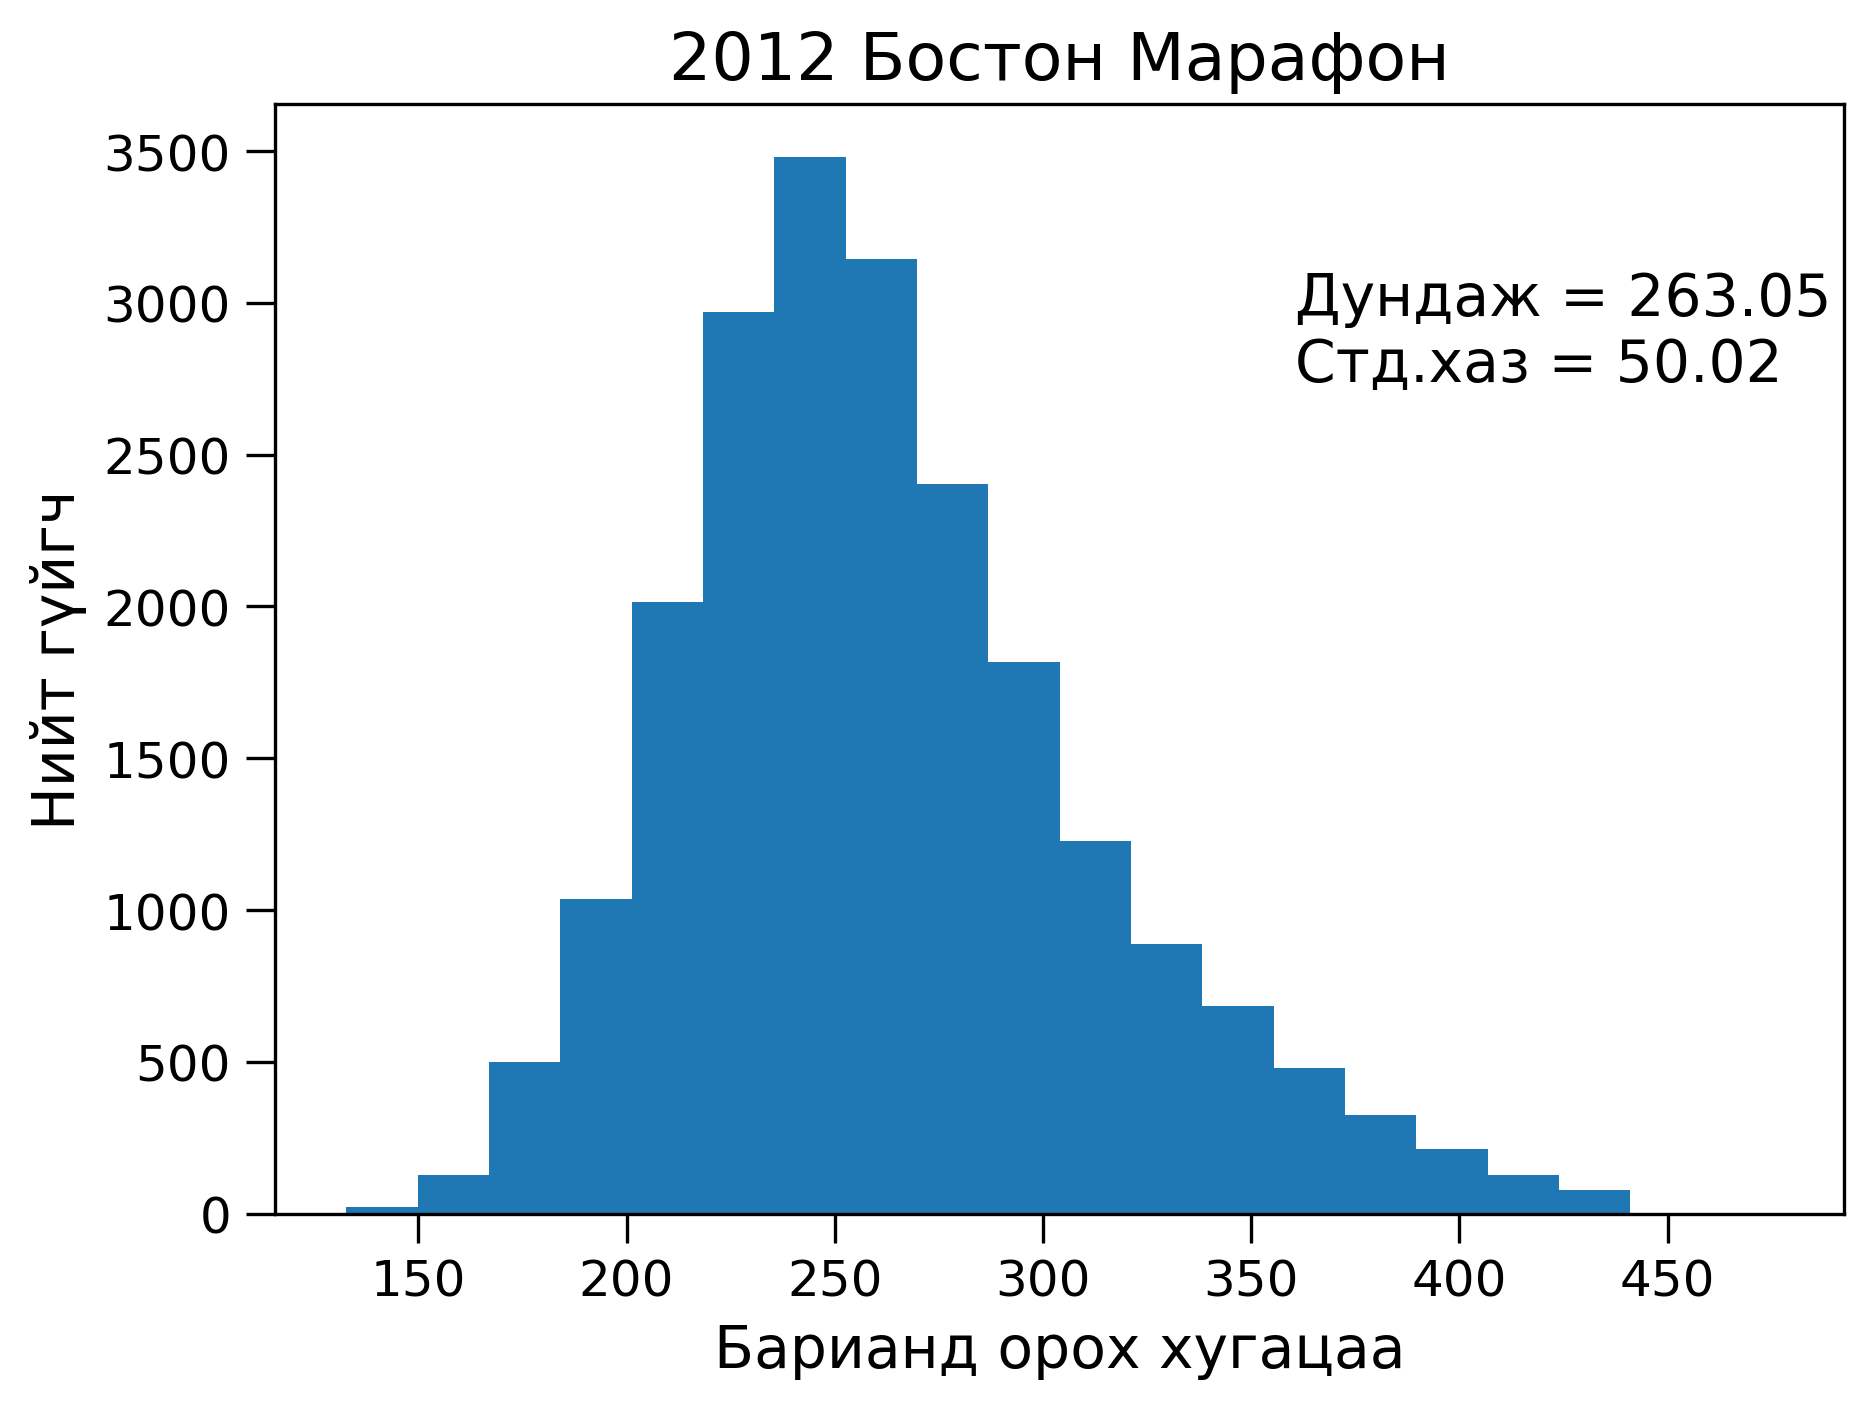

In [5]:
# Code on page 417             
times = get_BM_data('bm_results2012.csv')['time']
make_hist(times, 20, '2012 Бостон Марафон',
          'Барианд орох хугацаа', 'Нийт гүйгч')

plt.tight_layout()
plt.savefig('figure19-3.pdf', format='pdf', bbox_inches='tight', pad_inches=0.1)

In [7]:
# # Figure 19-4 on page 418
def sample_times(times, num_examples):
    """times нь бүх гүйгчдийн барианд орсон хугацааг илэрхийлэх float  
       төрлийн жагсаалт гэж үзнэ. num_examples нь бүхэл тоо (int)
       num_examples хэмжээтэй санамсаргүй түүвэр үүсгээд,
       тархалтыг дундаж утга болон стандарт хазайлтын хамт харуулсан
       гистограмм гаргана"""
    sample = random.sample(times, num_examples)
    make_hist(sample, 10, 'Түүврийн хэмжээ ' + str(num_examples),
            'Барианд орох хугацаа', 'Нийт гүйгч')


Probability of being within 3 of true mean of tight dist. = 0.9973
Probability of being within 3 of true mean of wide dist. = 0.0239


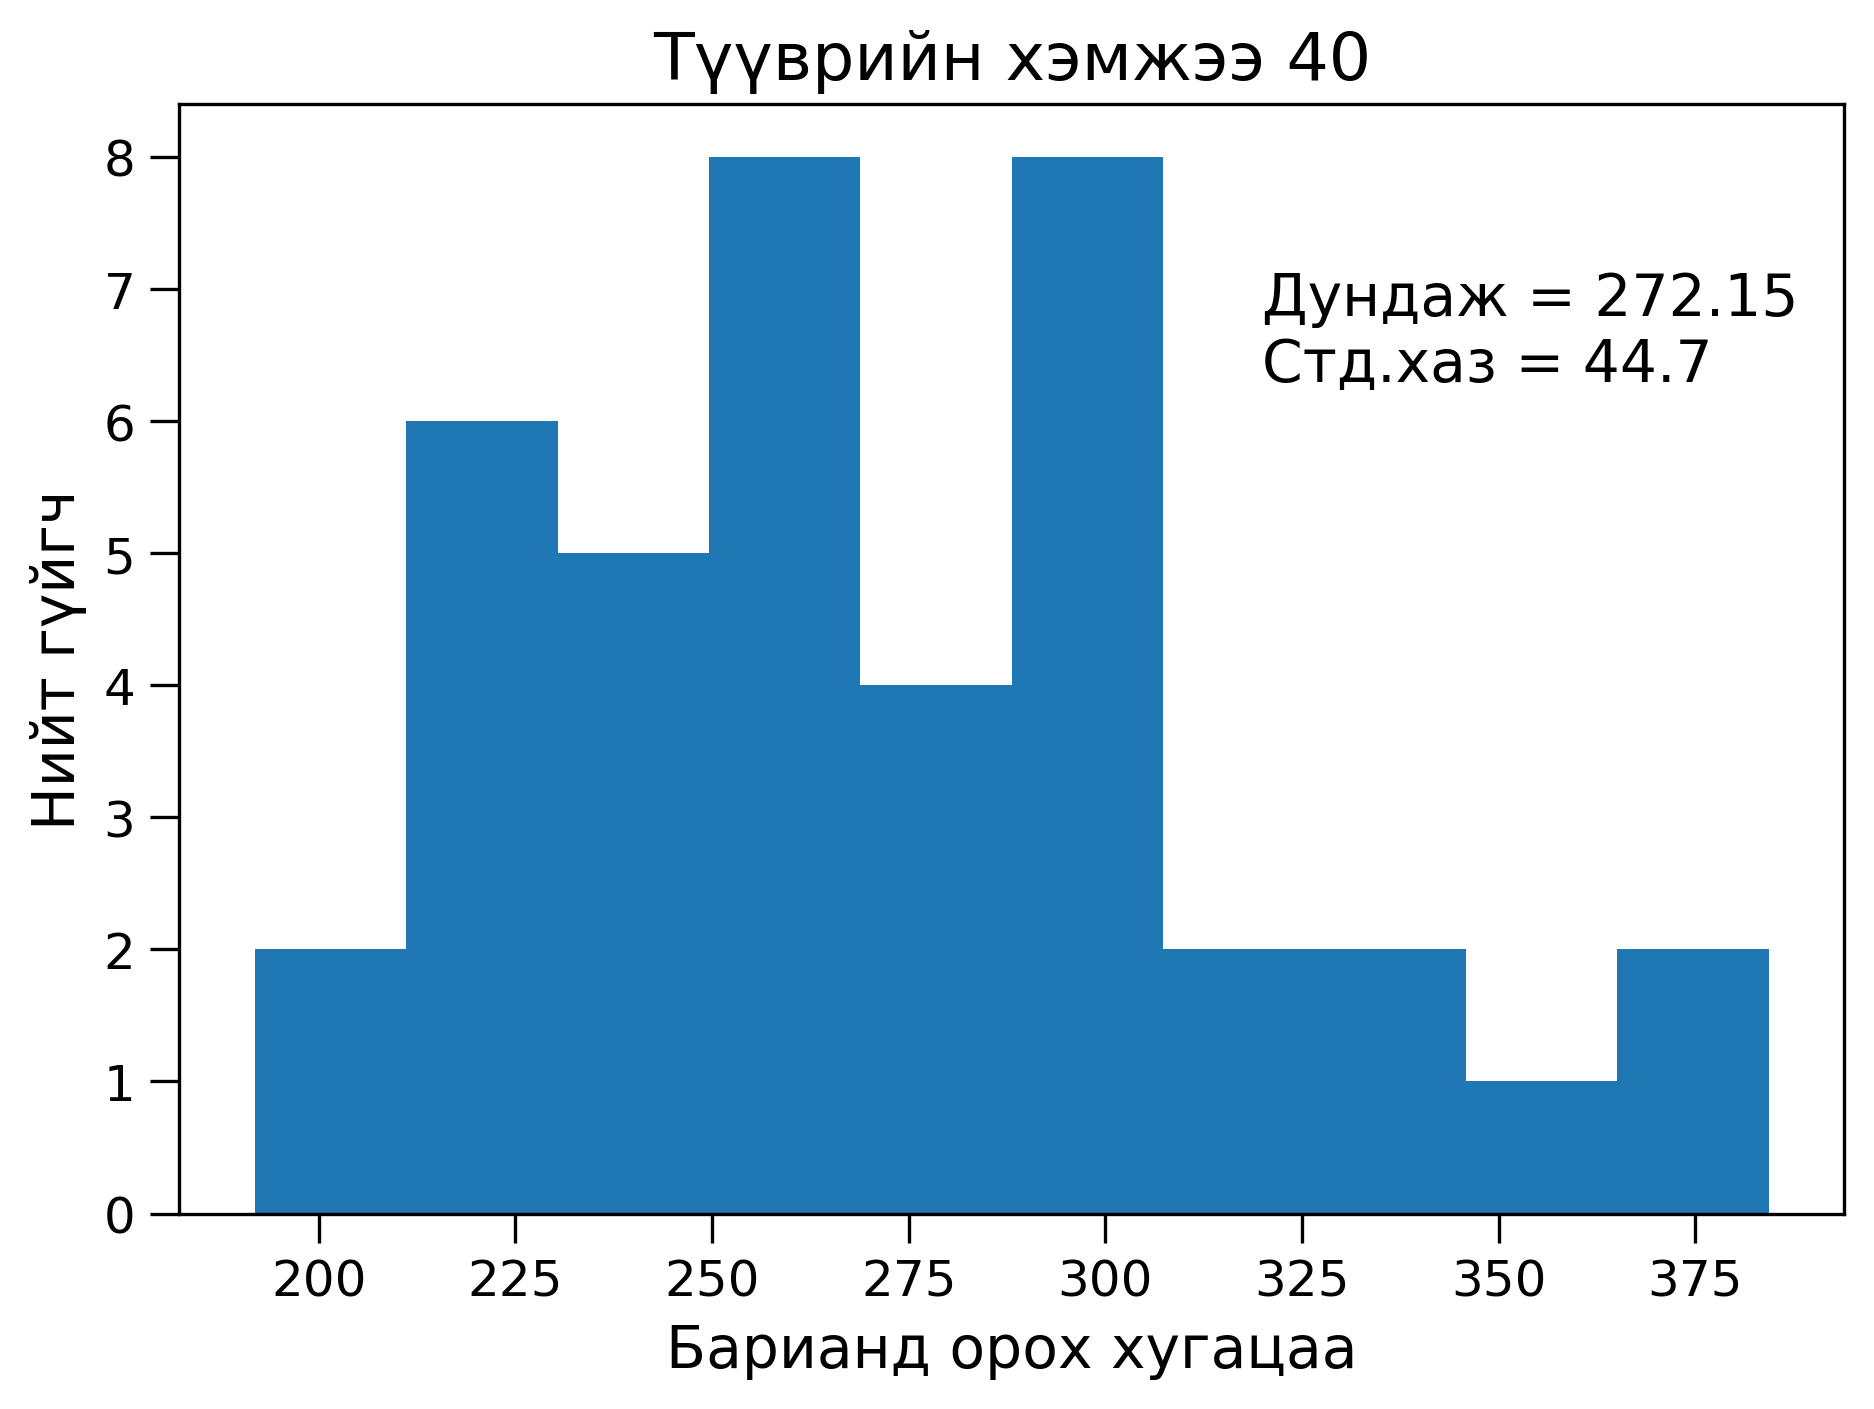

In [8]:
random.seed(0)
sample_size = 40       
sample_times(times, sample_size)
plt.tight_layout()
plt.savefig('figure19-5.pdf', format='pdf', bbox_inches='tight', pad_inches=0.1)

# Figure 19-6 on page 419
def gaussian(x, mu, sigma):
    factor1 = (1/(sigma*((2*np.pi)**0.5)))
    factor2 = np.e**-(((x-mu)**2)/(2*sigma**2))
    return factor1*factor2

area = round(scipy.integrate.quad(gaussian, -3, 3, (0, 1))[0], 4)
print('Probability of being within 3',
      'of true mean of tight dist. =', area)
area = round(scipy.integrate.quad(gaussian, -3, 3, (0, 100))[0], 4)
print('Probability of being within 3',
      'of true mean of wide dist. =', area)


In [9]:
# # Figure 19-7 on page 421
def test_samples(num_trials, sample_size):
    tight_means, wide_means = [], []
    for t in range(num_trials):
        sample_tight, sample_wide = [], []
        for i in range(sample_size):
            sample_tight.append(random.gauss(0, 1))
            sample_wide.append(random.gauss(0, 100))
        tight_means.append(sum(sample_tight)/len(sample_tight))
        wide_means.append(sum(sample_wide)/len(sample_wide))
    return tight_means, wide_means

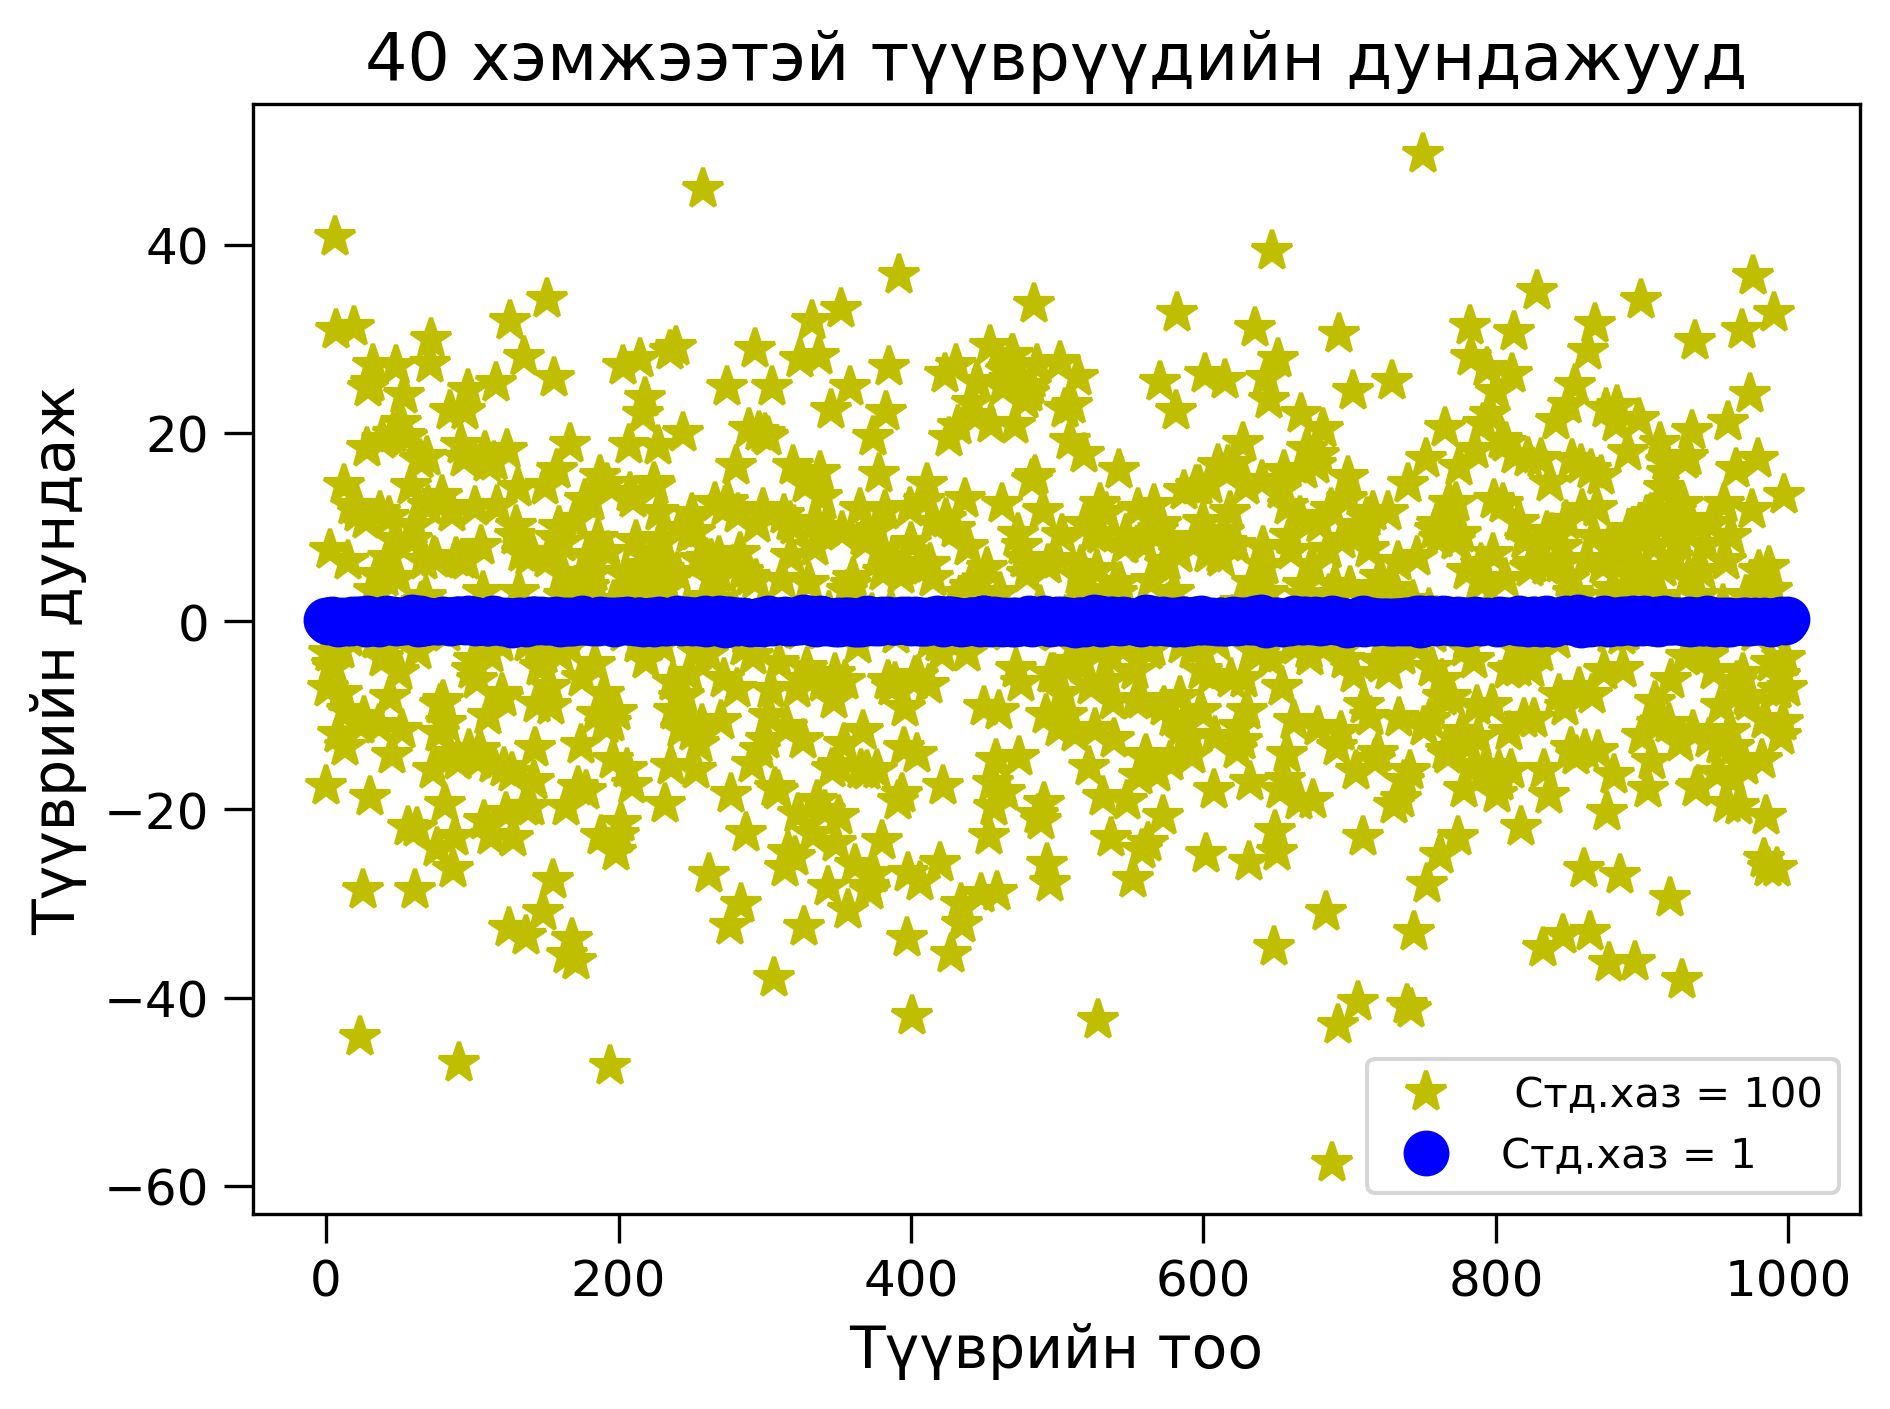

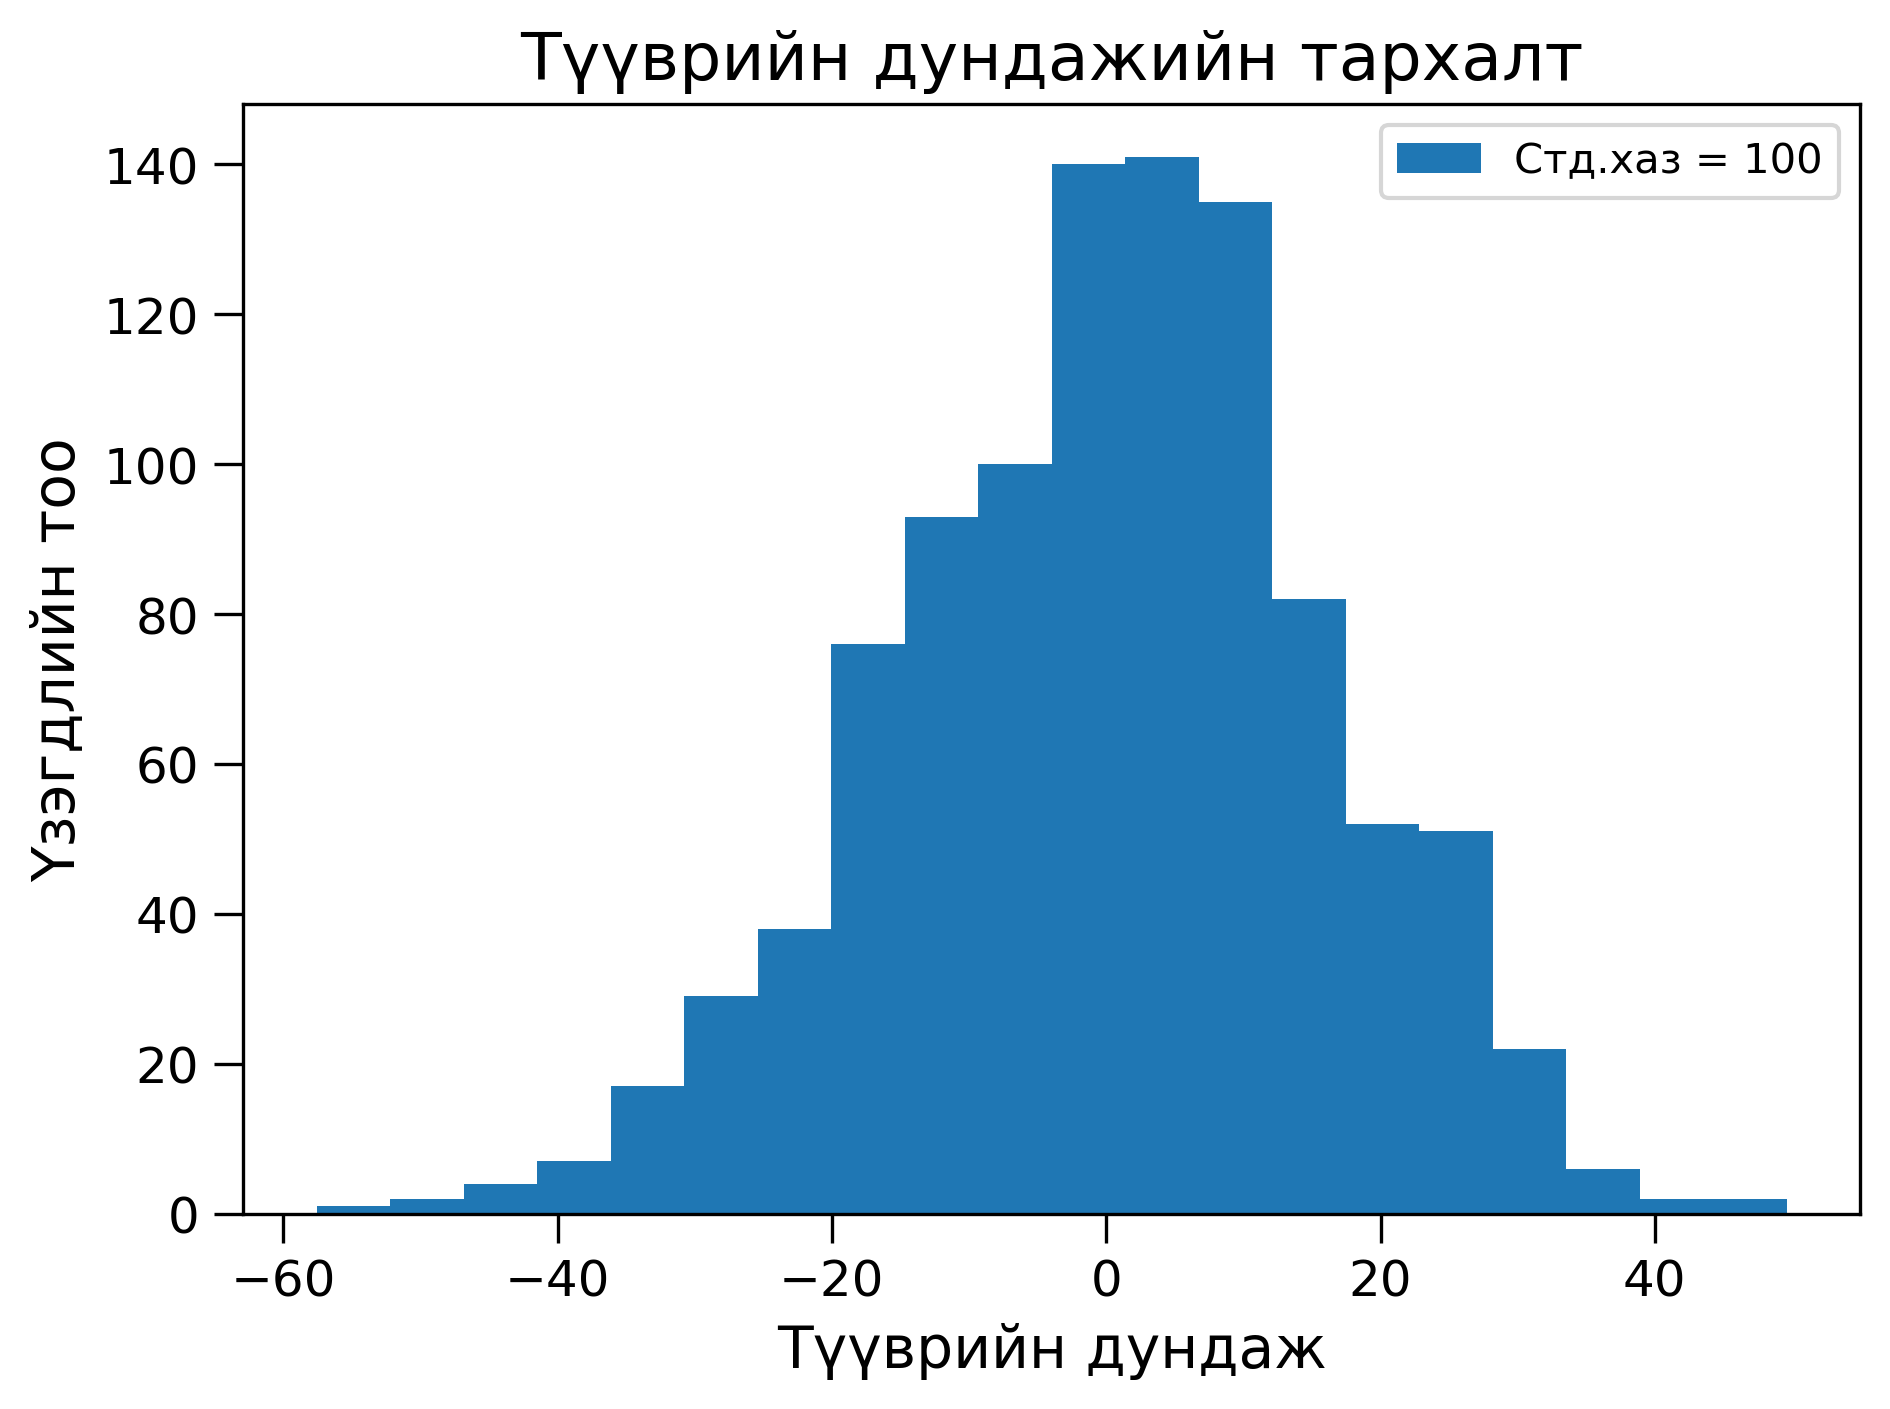

In [10]:
tight_means, wide_means = test_samples(1000, 40)
plt.plot(wide_means, 'y*', label = ' Стд.хаз = 100')
plt.plot(tight_means, 'bo', label = 'Стд.хаз = 1')
plt.xlabel('Түүврийн тоо')
plt.ylabel('Түүврийн дундаж')
plt.title(str(40)+' хэмжээтэй түүврүүдийн дундажууд')
plt.legend()
plt.tight_layout()
plt.savefig('figure19-8a.pdf', format='pdf', bbox_inches='tight', pad_inches=0.1)

plt.figure()
plt.hist(wide_means, bins = 20, label = 'Стд.хаз = 100')
plt.title('Түүврийн дундажийн тархалт')
plt.xlabel('Түүврийн дундаж')
plt.ylabel('Үзэгдлийн тоо')
plt.legend()
plt.tight_layout()
plt.savefig('figure19-8b.pdf', format='pdf', bbox_inches='tight', pad_inches=0.1)

In [11]:
# # Figure 19-9 on page 423
def plot_means(num_dice_per_trial, num_dice_thrown, num_bins,
              legend, color, style):
    means = []
    num_trials = num_dice_thrown//num_dice_per_trial
    for i in range(num_trials):
        vals = 0
        for j in range(num_dice_per_trial):
            vals += 5*random.random()
        means.append(vals/num_dice_per_trial)
    plt.hist(means, num_bins, color = color, label = legend,
               weights = np.array(len(means)*[1])/len(means),
               hatch = style)
    return sum(means)/len(means), np.var(means)

1 шоо хаялтын дундаж = 2.499 Дисперс = 2.0828
100 шоо хаялтын дундаж = 2.4975 Дисперс = 0.0208


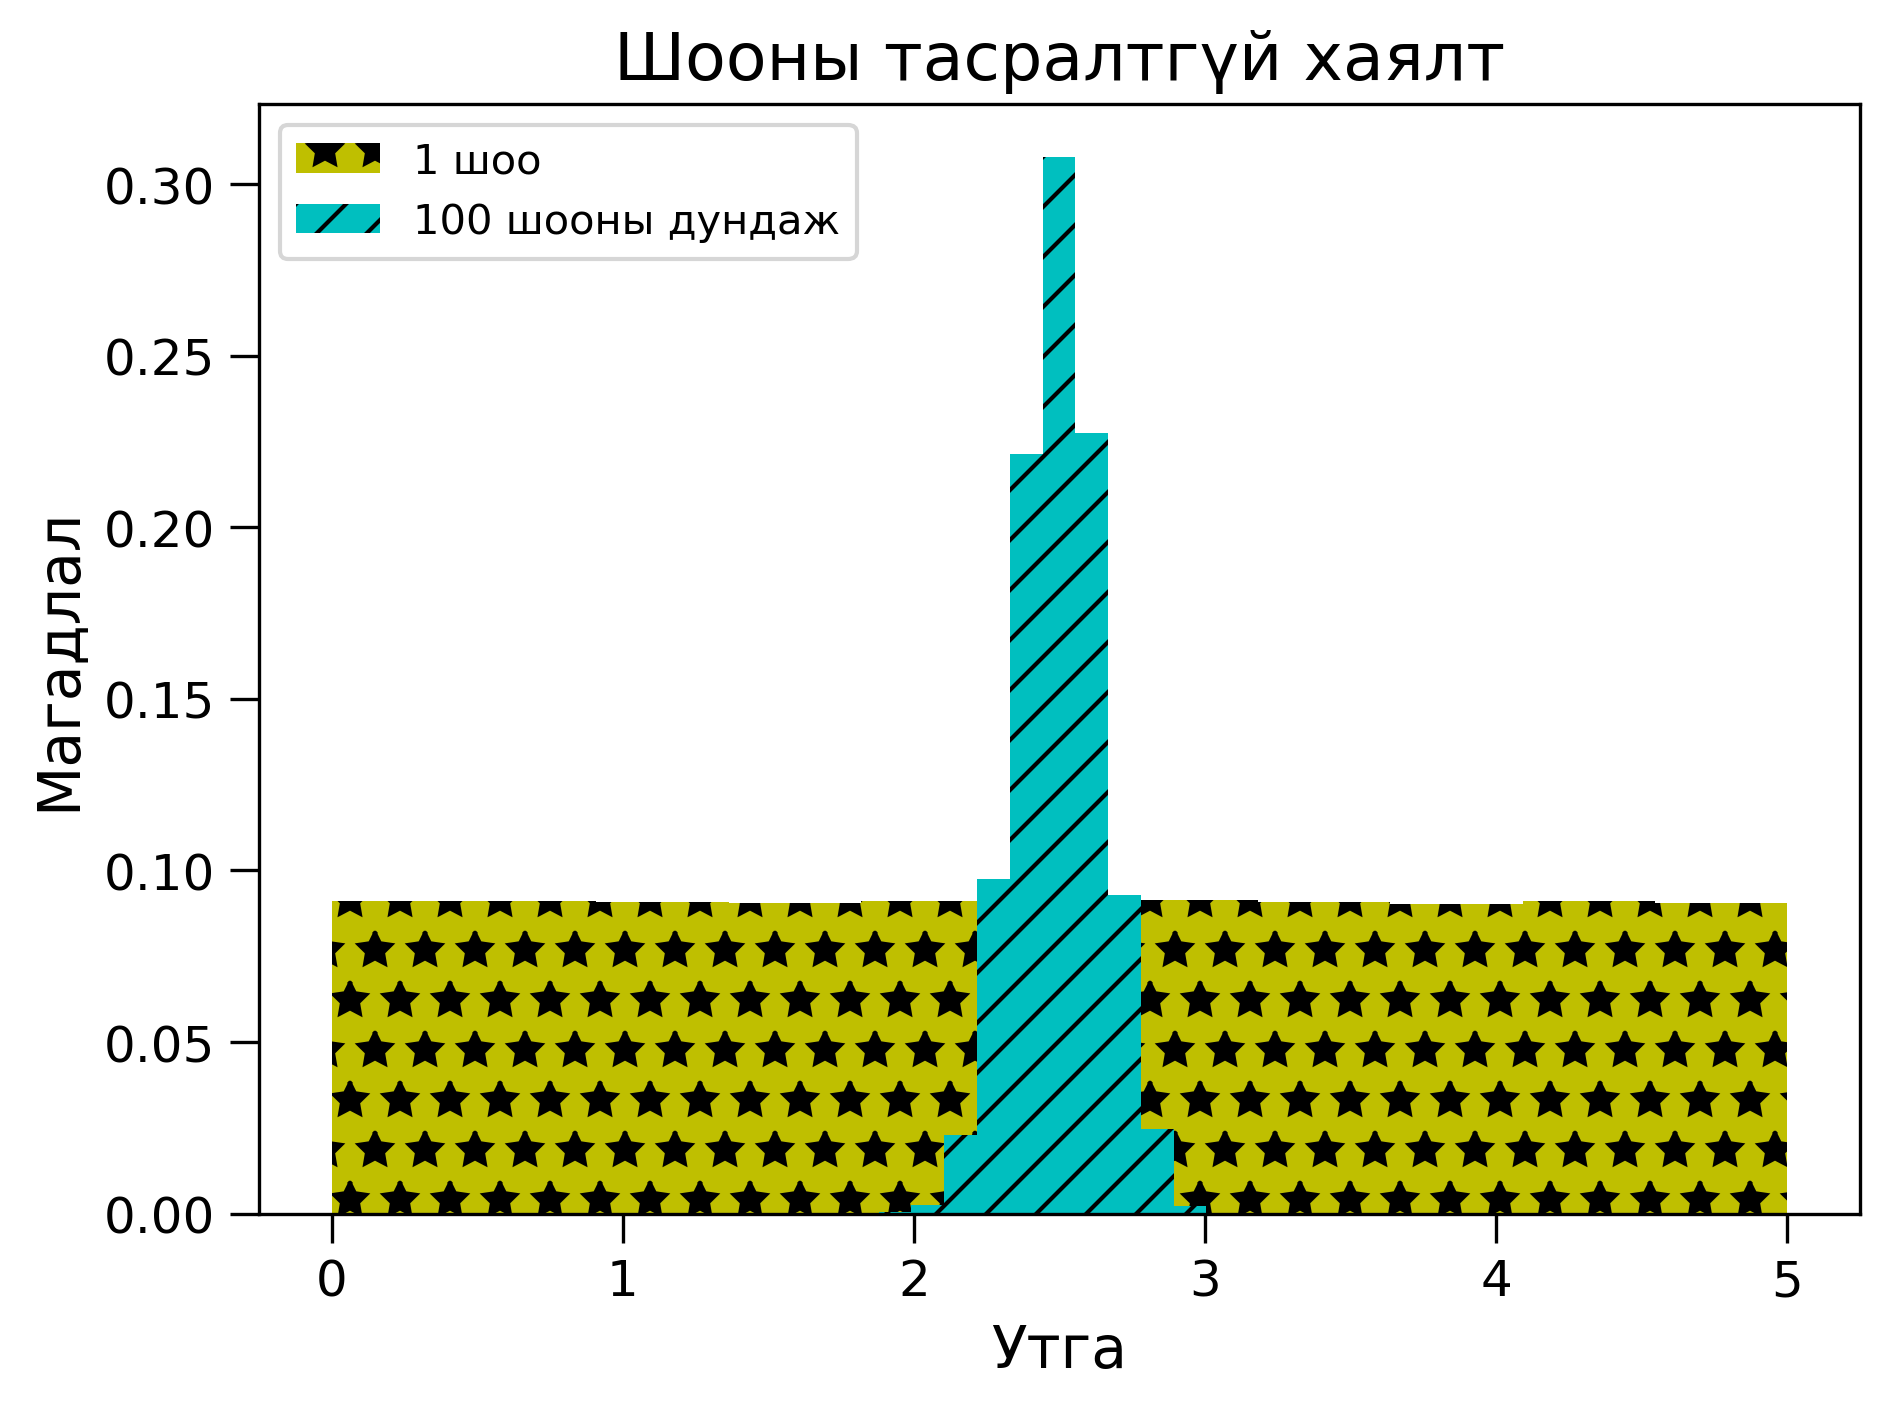

In [12]:
mean, var = plot_means(1, 1000000, 11, '1 шоо', 'y', '*')
print('1 шоо хаялтын дундаж =', round(mean,4),
      'Дисперс =', round(var,4))
mean, var = plot_means(100, 1000000, 11,
                      '100 шооны дундаж', 'c', '//')
print('100 шоо хаялтын дундаж =', round(mean, 4),
      'Дисперс =', round(var, 4))
plt.title('Шооны тасралтгүй хаялт')
plt.xlabel('Утга')
plt.ylabel('Магадлал')
plt.legend(loc = 'upper left')

plt.tight_layout()
plt.savefig('figure19-10.pdf', format='pdf', bbox_inches='tight', pad_inches=0.1)

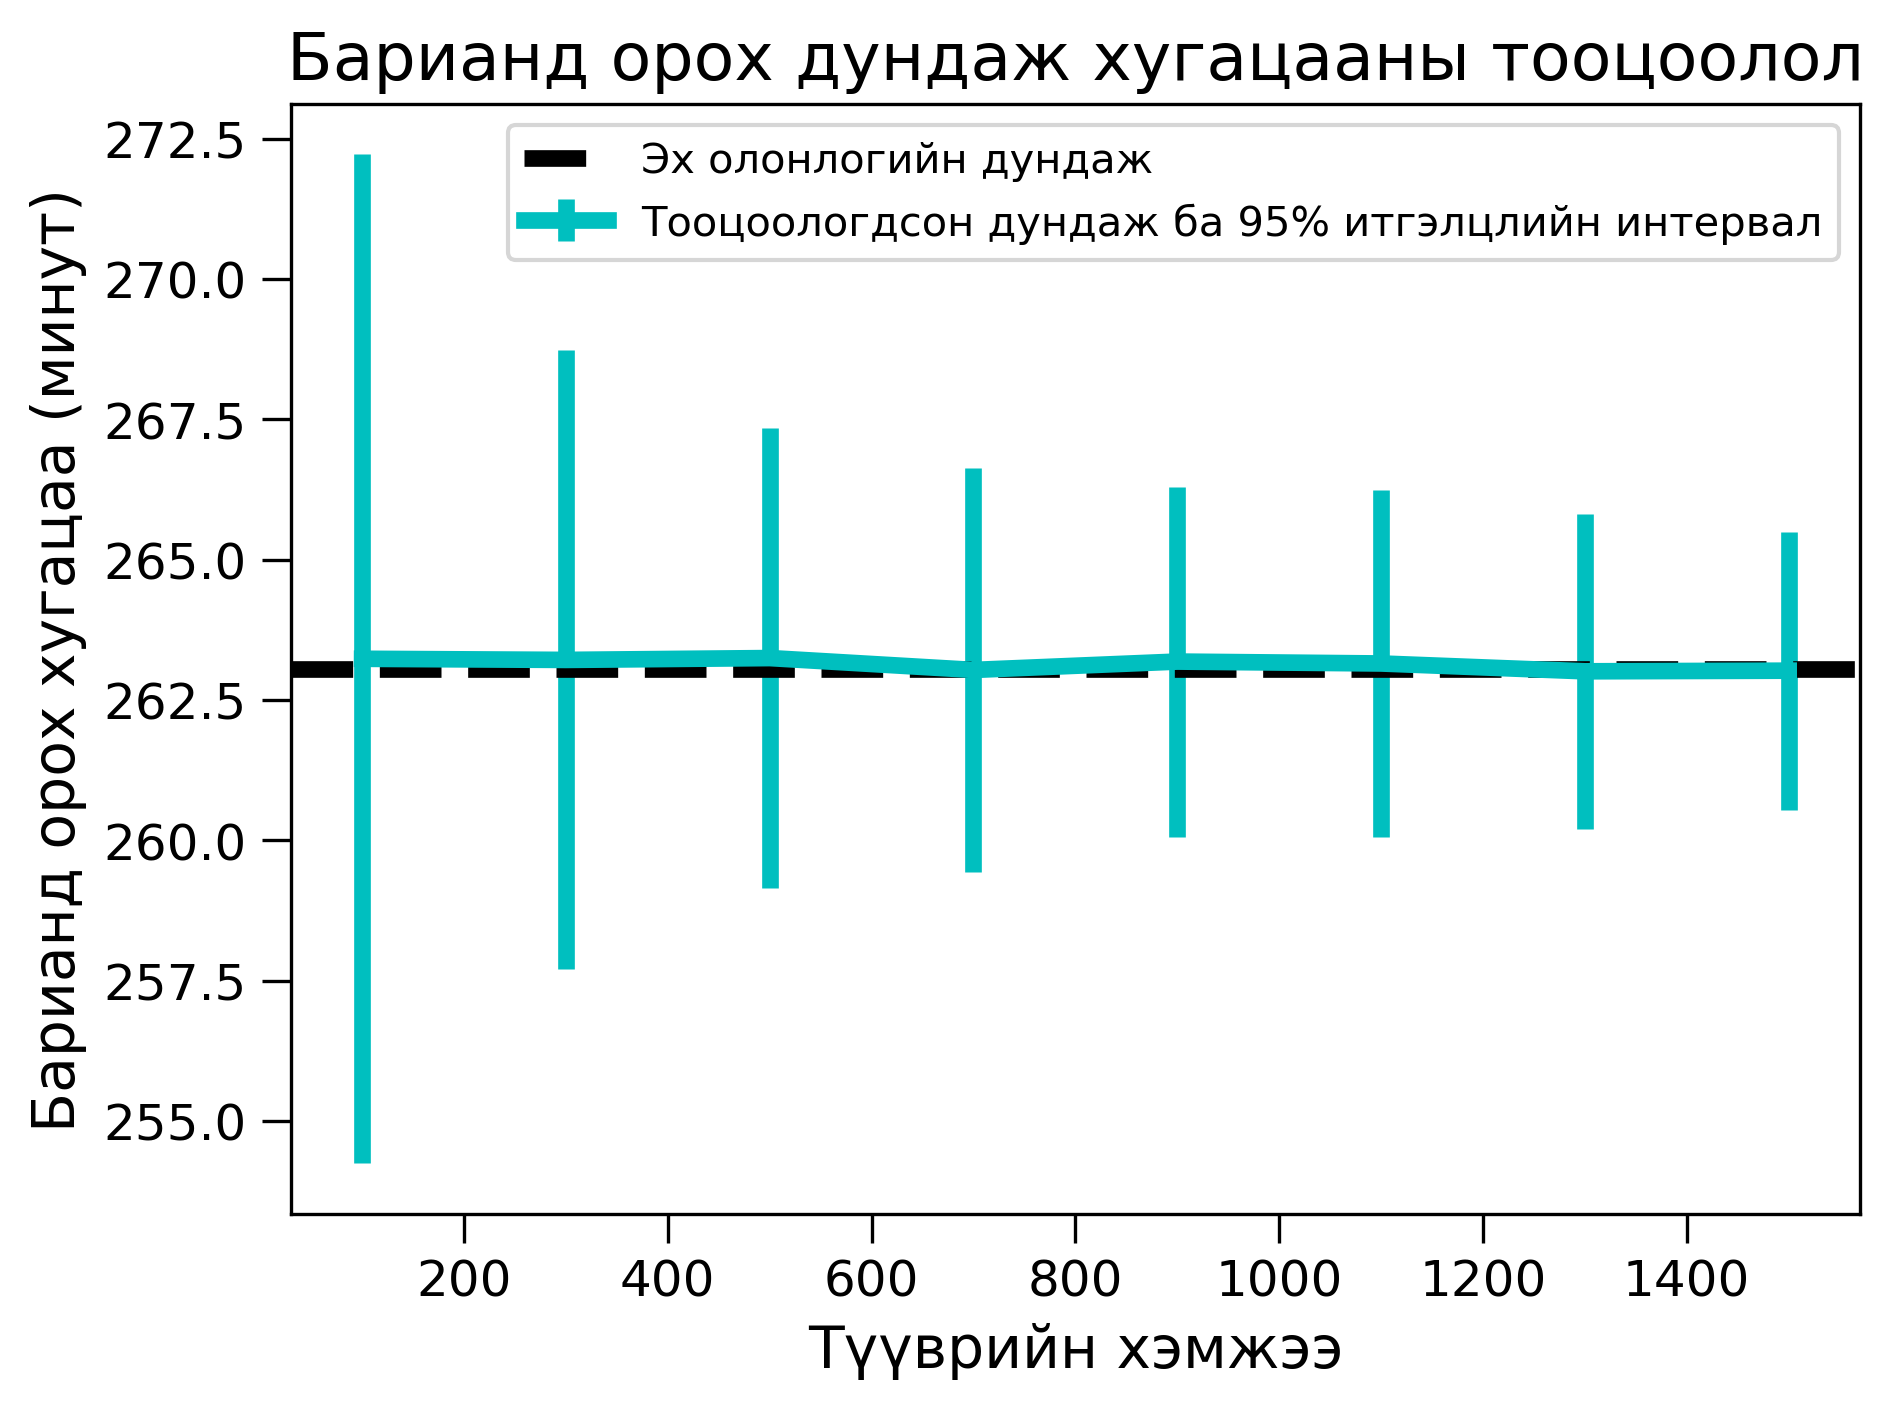

In [13]:
# Figure 19-11 on page 426
times = get_BM_data('bm_results2012.csv')['time']
mean_of_means, std_of_means = [], []
sample_sizes = range(100, 1501, 200)
for sample_size in sample_sizes:
    sample_means = []
    for t in range(200):
        sample = random.sample(times, sample_size)
        sample_means.append(sum(sample)/sample_size)
    mean_of_means.append(sum(sample_means)/len(sample_means))
    std_of_means.append(np.std(sample_means))
plt.errorbar(sample_sizes, mean_of_means, color = 'c',
                yerr = 1.96*np.array(std_of_means),
                label = 'Тооцоологдсон дундаж ба 95% итгэлцлийн интервал')
plt.axhline(sum(times)/len(times), linestyle = '--', color = 'k',
            label = 'Эх олонлогийн дундаж')
plt.title('Барианд орох дундаж хугацааны тооцоолол')
plt.xlabel('Түүврийн хэмжээ')
plt.ylabel('Барианд орох хугацаа (минут)')
plt.legend(loc = 'best')

plt.tight_layout()
plt.savefig('figure19-12.pdf', format='pdf', bbox_inches='tight', pad_inches=0.1)

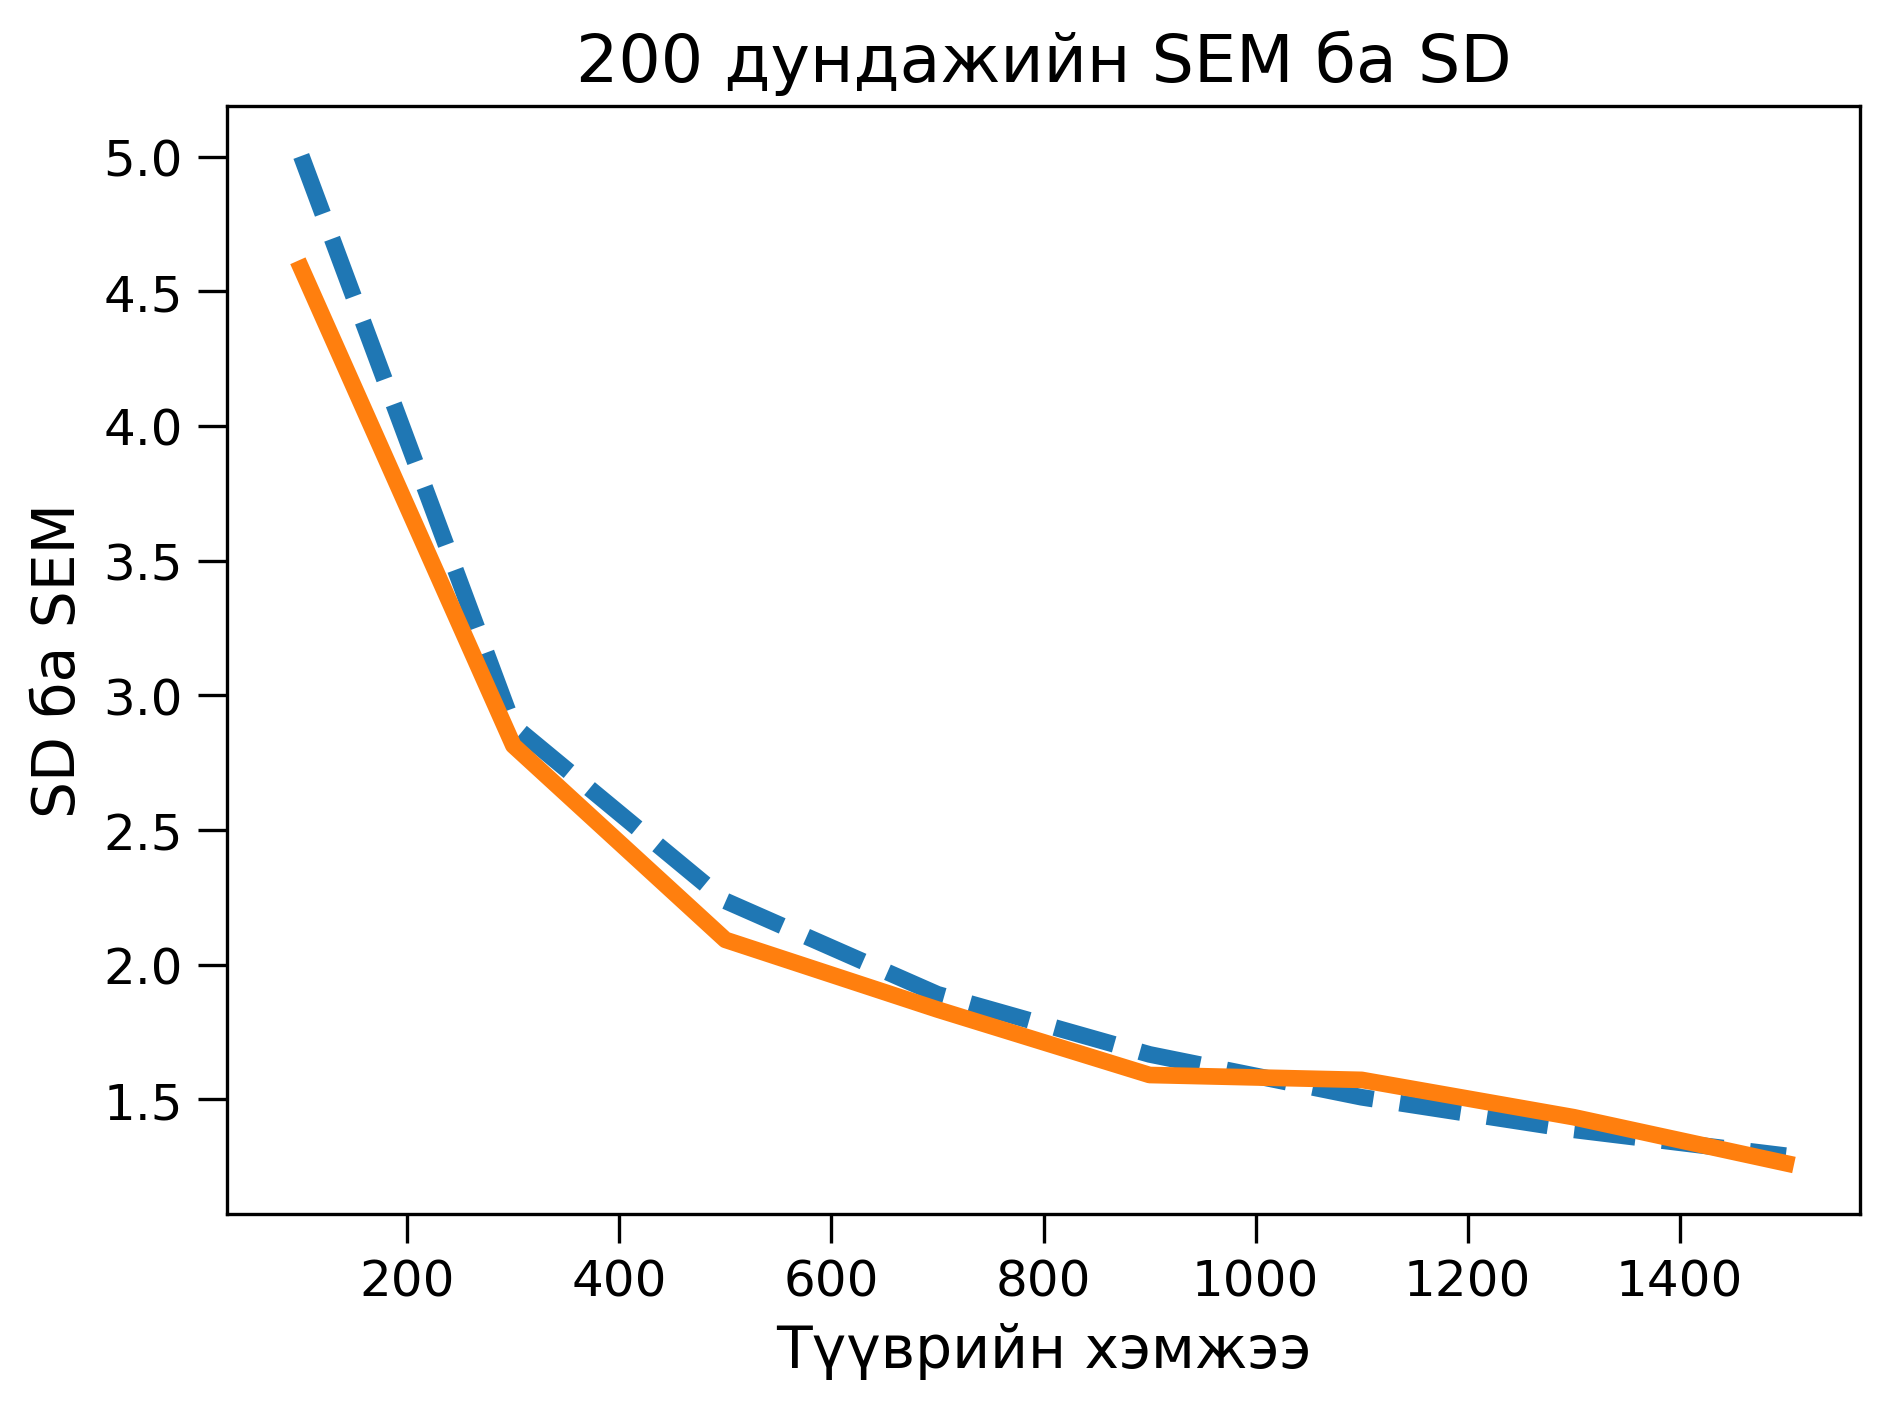

In [15]:
# Code used to produce Figure 19-13 on page 427
def SEM(n, sigma):
    return sigma/n**0.5

plt.figure()
sems = []
for sample_size in sample_sizes:
    sems.append(SEM(sample_size, 50.02))
plt.plot(sample_sizes, sems, '--', label = 'дундажуудын стандарт алдаа (SEM)')
plt.plot(sample_sizes, std_of_means, label ='дундажуудын стандарт хазайлт (STD)')
plt.title('200 дундажийн SEM ба SD')
plt.xlabel('Түүврийн хэмжээ')
plt.ylabel('SD ба SEM')
plt.tight_layout()
plt.savefig('figure19-13.pdf', format='pdf', bbox_inches='tight', pad_inches=0.1)

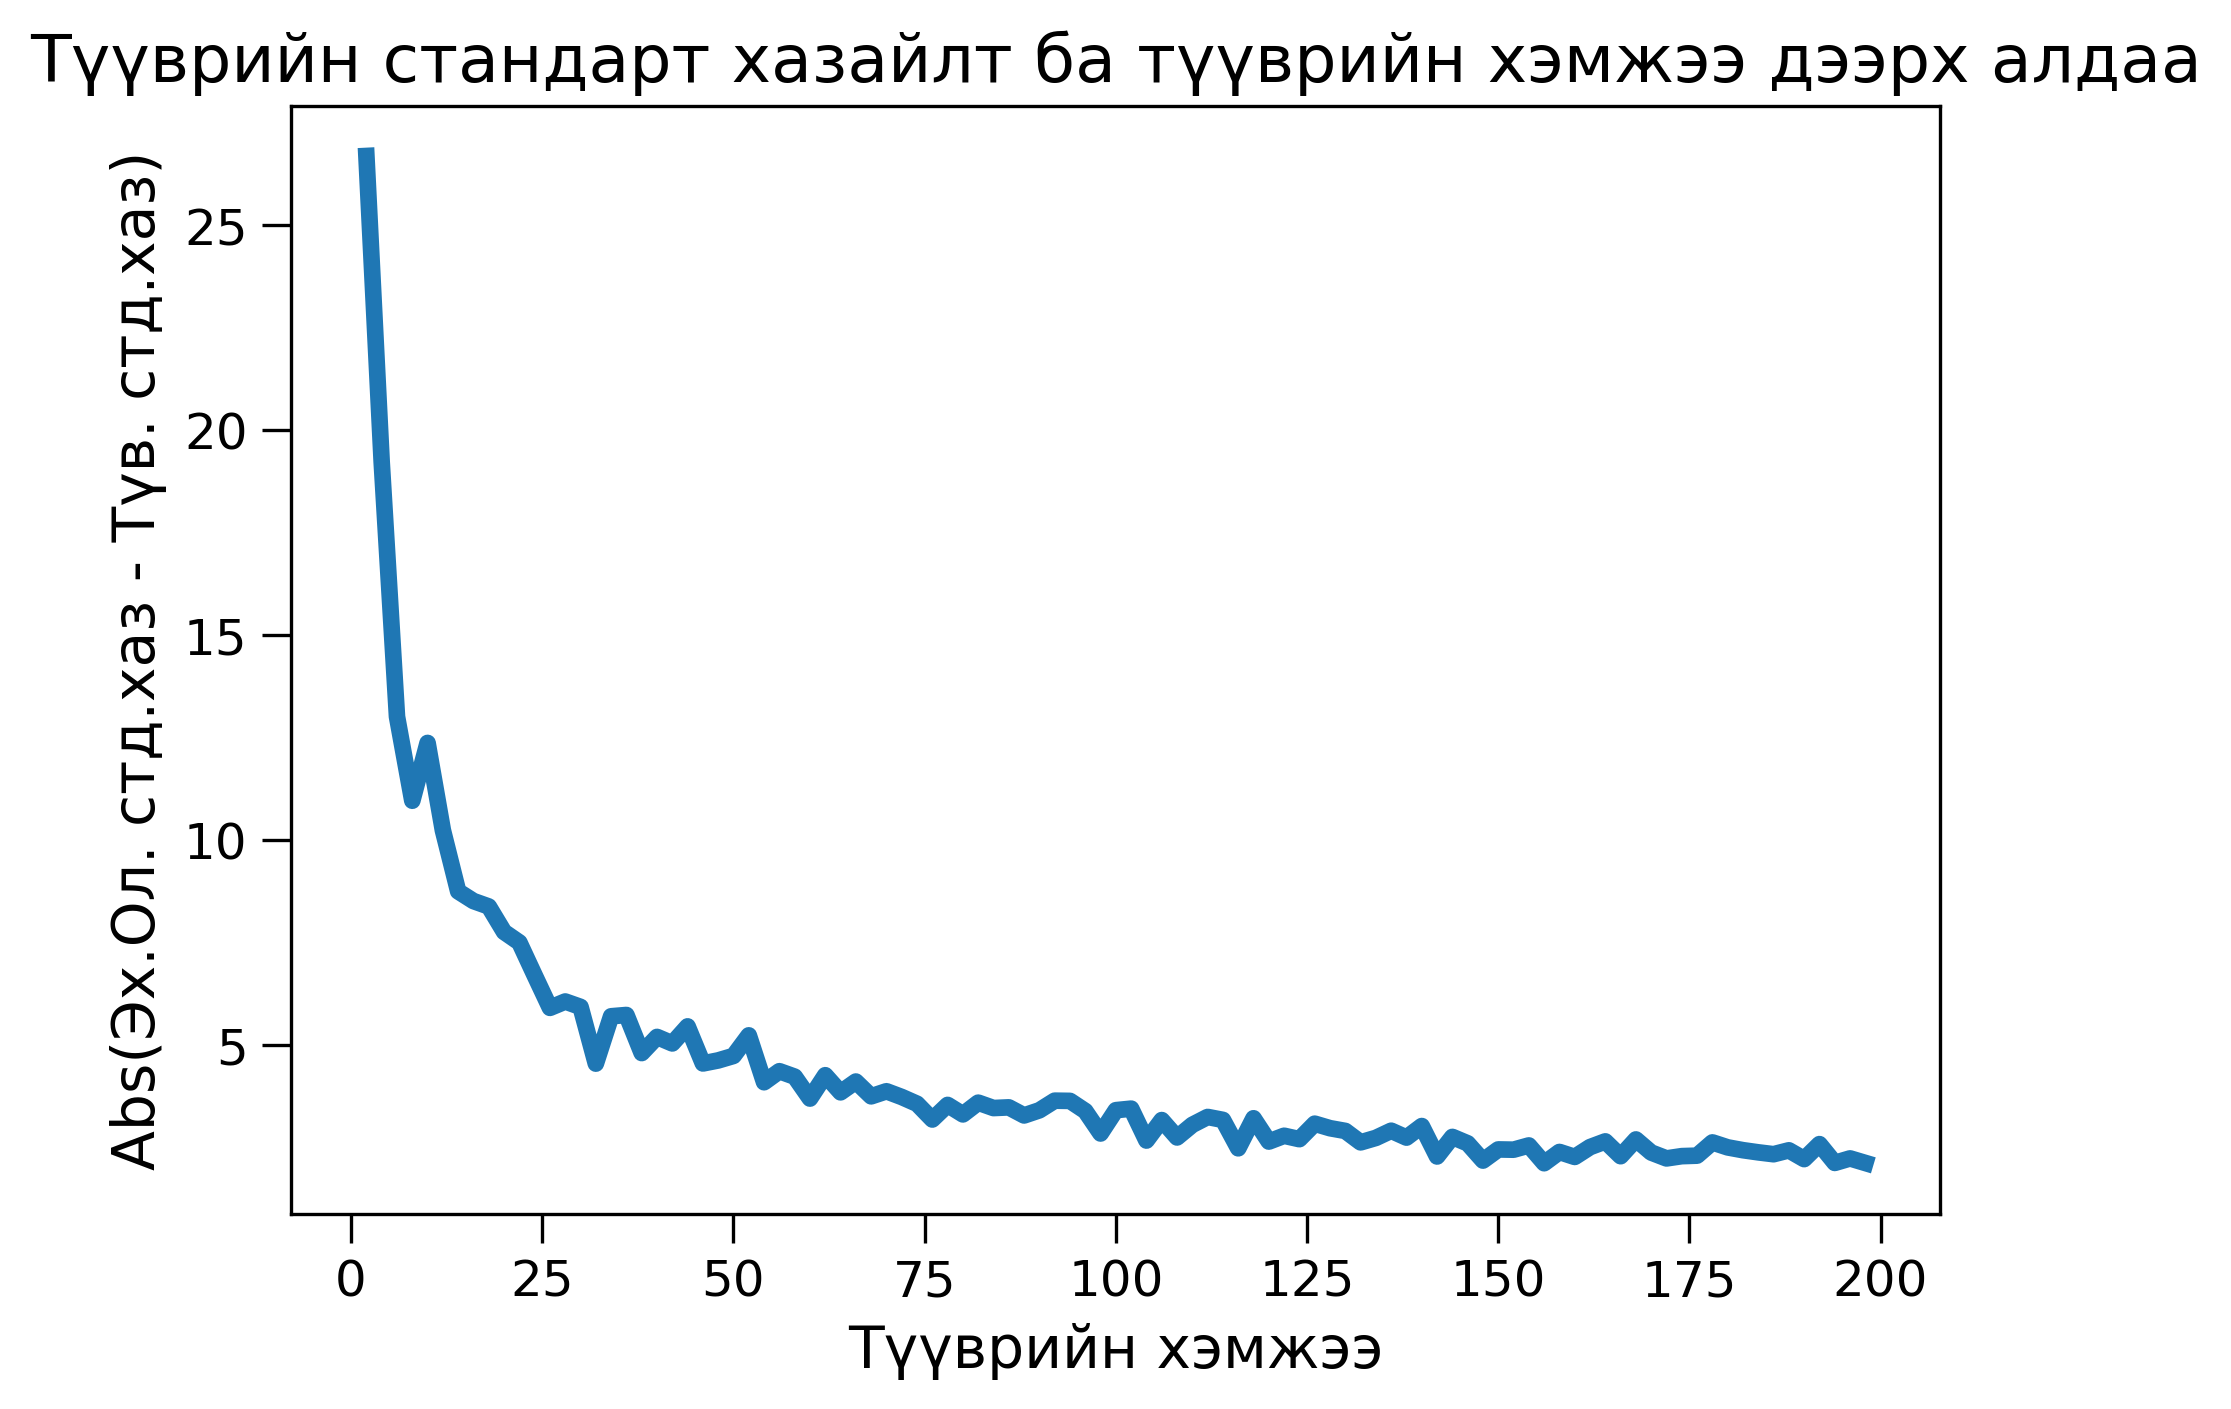

In [16]:
# Figure 19-14 on page 428
times = get_BM_data('bm_results2012.csv')['time']
pos_std = np.std(times)
sample_sizes = range(2, 200, 2)
diffs_means = []
for sample_size in sample_sizes:
    diffs = []
    for t in range(100):
        diffs.append(abs(pos_std - np.std(random.sample(times,
                                                        sample_size))))
    diffs_means.append(sum(diffs)/len(diffs))
plt.plot(sample_sizes, diffs_means)
plt.xlabel('Түүврийн хэмжээ')
plt.ylabel('Abs(Эх.Ол. стд.хаз - Түв. стд.хаз)')
plt.title('Түүврийн стандарт хазайлт ба түүврийн хэмжээ дээрх алдаа')

plt.tight_layout()
plt.savefig('figure19-15.pdf', format='pdf', bbox_inches='tight', pad_inches=0.1)